<a href="https://colab.research.google.com/github/miroa88/jupyter/blob/main/Big_Data_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Big Data Capstone project**<br><br>
Analysis and creation of logistic regression model for the heart attack data from the Kaggle website.

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn import preprocessing, svm, linear_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.feature_selection import f_regression, SelectKBest
from numpy import array 

**Downloading** the data set files:

heart.csv contains the heart disease dataset<br>
o2Saturation.csv contains o2 staturation data set

In [21]:
!wget https://raw.githubusercontent.com/miroa88/jupyter/main/Capstone/heart.csv
!wget https://raw.githubusercontent.com/miroa88/jupyter/main/Capstone/o2Saturation.csv

--2023-02-08 01:06:05--  https://raw.githubusercontent.com/miroa88/jupyter/main/Capstone/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11019 (11K) [text/plain]
Saving to: ‘heart.csv.3’

heart.csv.3         100%[===================>]  10.76K  --.-KB/s    in 0s      

2023-02-08 01:06:05 (86.9 MB/s) - ‘heart.csv.3’ saved [11019/11019]

--2023-02-08 01:06:05--  https://raw.githubusercontent.com/miroa88/jupyter/main/Capstone/o2Saturation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17854 (17K) [text/plain]
Saving to

In [22]:
df = pd.read_csv('heart.csv')

Cleaning Data: We check if there are any duplicates in the heart attack analysis dataset. Only one duplicated record was found, which was dropped from the dataset. In addition, we check if there are any null data entires in our dataset. The dataset did not contain any null data entries so we did not take any action. Moreover, we also checked if there were any missing data entries in our dataset and the dataset did not have missing data either.

In [23]:
sum(df.duplicated())

1

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
#check for misssing data
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [28]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
df.groupby(by='sex')['age'].mean()

sex
0    55.677083
1    53.834951
Name: age, dtype: float64

above we checked the distribution of the average age of men and women

In [31]:
df[df['output'] == 1].groupby('sex')['age'].mean()

sex
0    54.555556
1    51.043478
Name: age, dtype: float64

above are the average age of men and women who had an increased chance of a heart attack

In [32]:
df.loc[:, ['age', 'sex']]

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0
...,...,...
298,57,0
299,45,1
300,68,1
301,57,1


Checking the distribution of the features

In [33]:
def plot_hist(df):
    colors = list(mcolors.CSS4_COLORS.keys())[10:]
    fig = plt.figure(figsize=(16, 16))

    for i, feature in enumerate(df.columns):
        f = fig.add_subplot(7, 3, i + 1)
        df[feature].hist(ax=f, facecolor=colors[i])
        f.set_title(f'{feature} Histogram', color=colors[35])
        f.set_yscale('log')

    fig.tight_layout()
    plt.show()

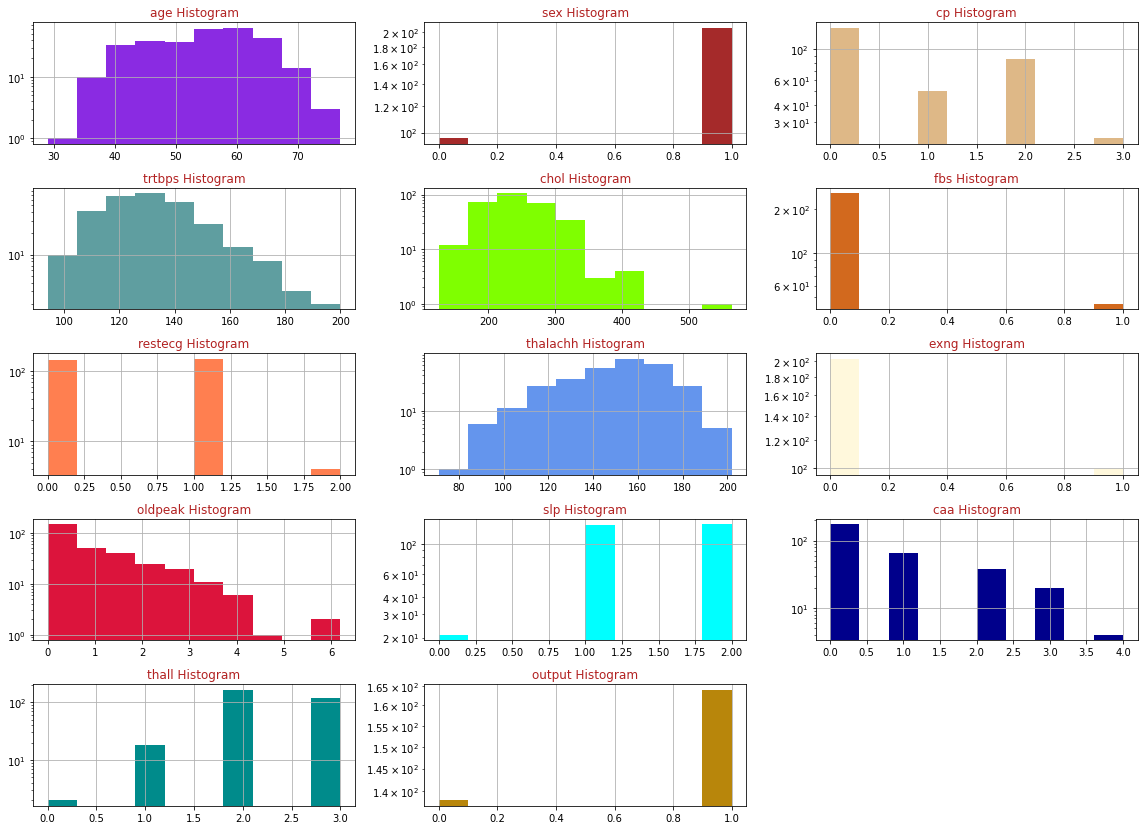

In [34]:
plot_hist(df)


### Comparing features for male and female.

In [35]:
def plot_histo_compare(male_df, female_df):
    fig = plt.figure(figsize=(35, 35))
    i = 0
    for feature in male_df.columns:
        i += 1
        f = fig.add_subplot(14, 2, i)
        male_df[feature].hist(ax=f)
        f.set_title(f'Male {feature}')
        i += 1
        f = fig.add_subplot(14, 2, i)
        female_df[feature].hist(ax=f, facecolor=(1, 0, 0))
        f.set_title(f'Female {feature}')

    plt.show()

In [36]:
male_samples = df[df['sex'] == 1].iloc[:, (df.columns != 'sex')]
female_samples = df[df['sex'] == 0].iloc[:, df.columns != 'sex']

print(f'There are {len(male_samples)} male_samples')
print(f'There are {len(female_samples)} female_samples')

There are 206 male_samples
There are 96 female_samples


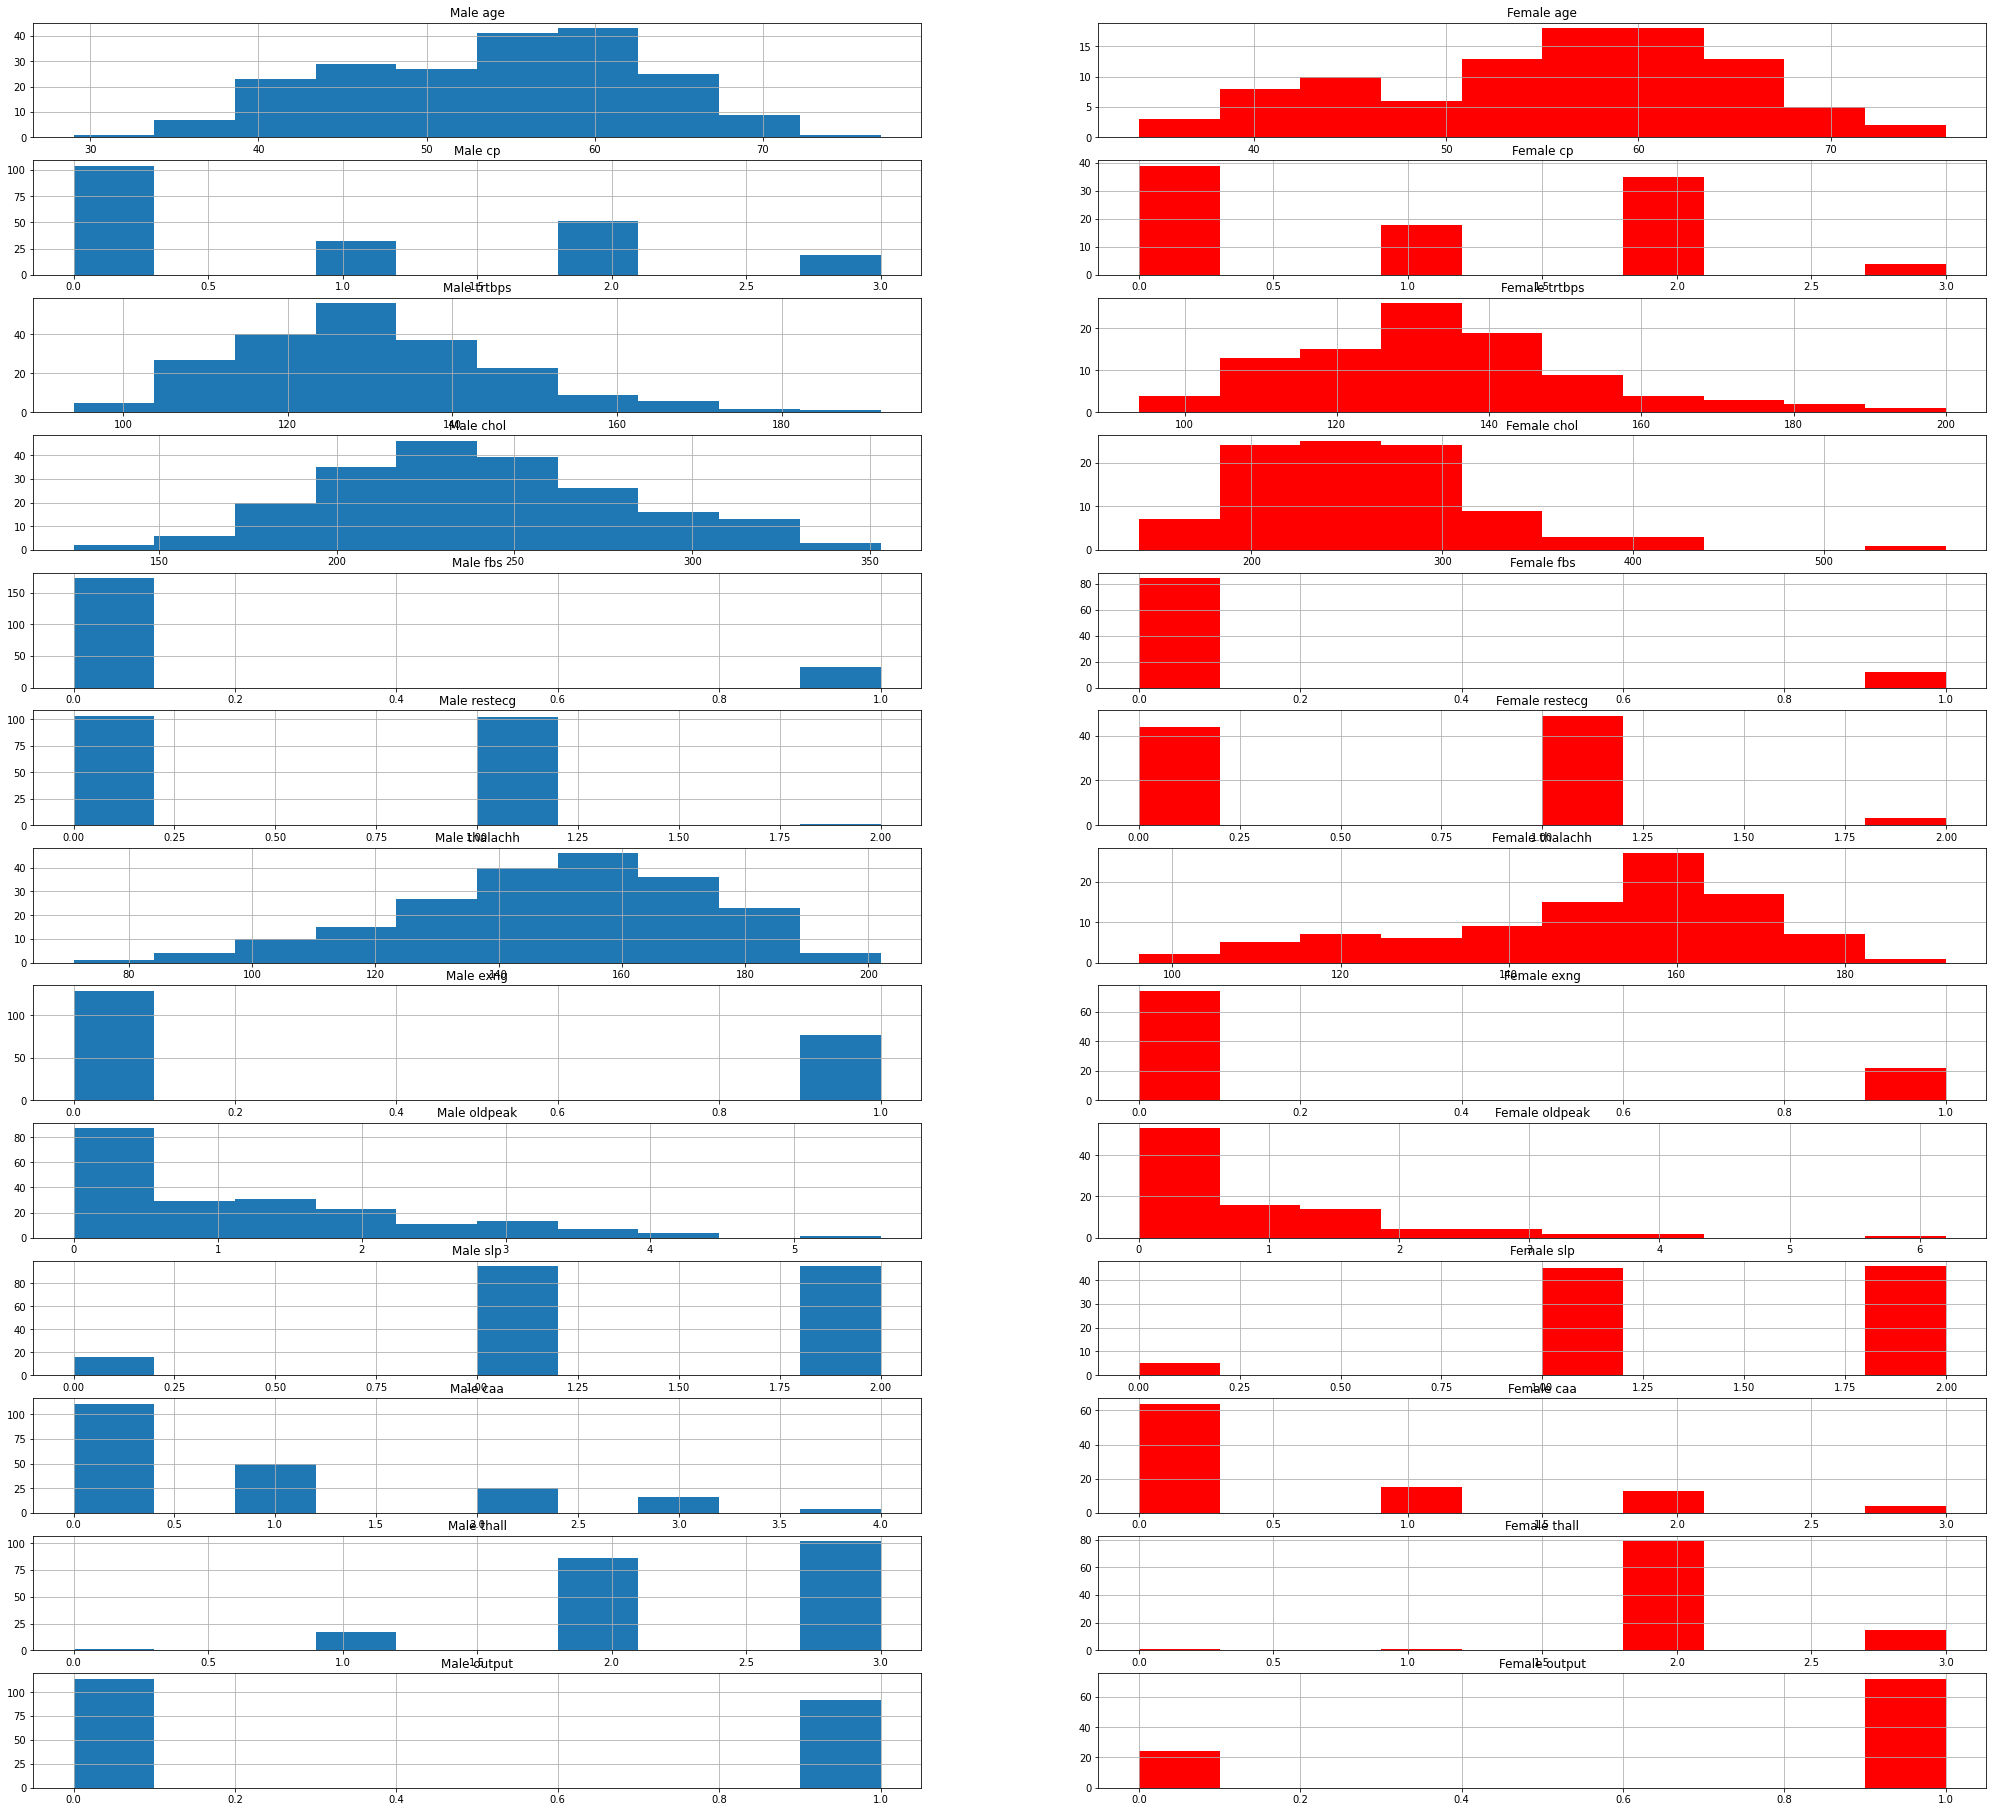

In [37]:
plot_histo_compare(male_samples, female_samples)

In [38]:
def risk_percentage(data, patient):
  risk_per = sum(data['output']) / len(data)
  print(f'Percentage of {patient} patients with increased risk of heart attack: {100 * risk_per:.2f}%')

In [39]:
risk_percentage(df, 'all')
risk_percentage(male_samples, 'male')
risk_percentage(female_samples, 'female')

Percentage of all patients with increased risk of heart attack: 54.30%
Percentage of male patients with increased risk of heart attack: 44.66%
Percentage of female patients with increased risk of heart attack: 75.00%


Comparing cholesterol, blood pressure and heart rate against age

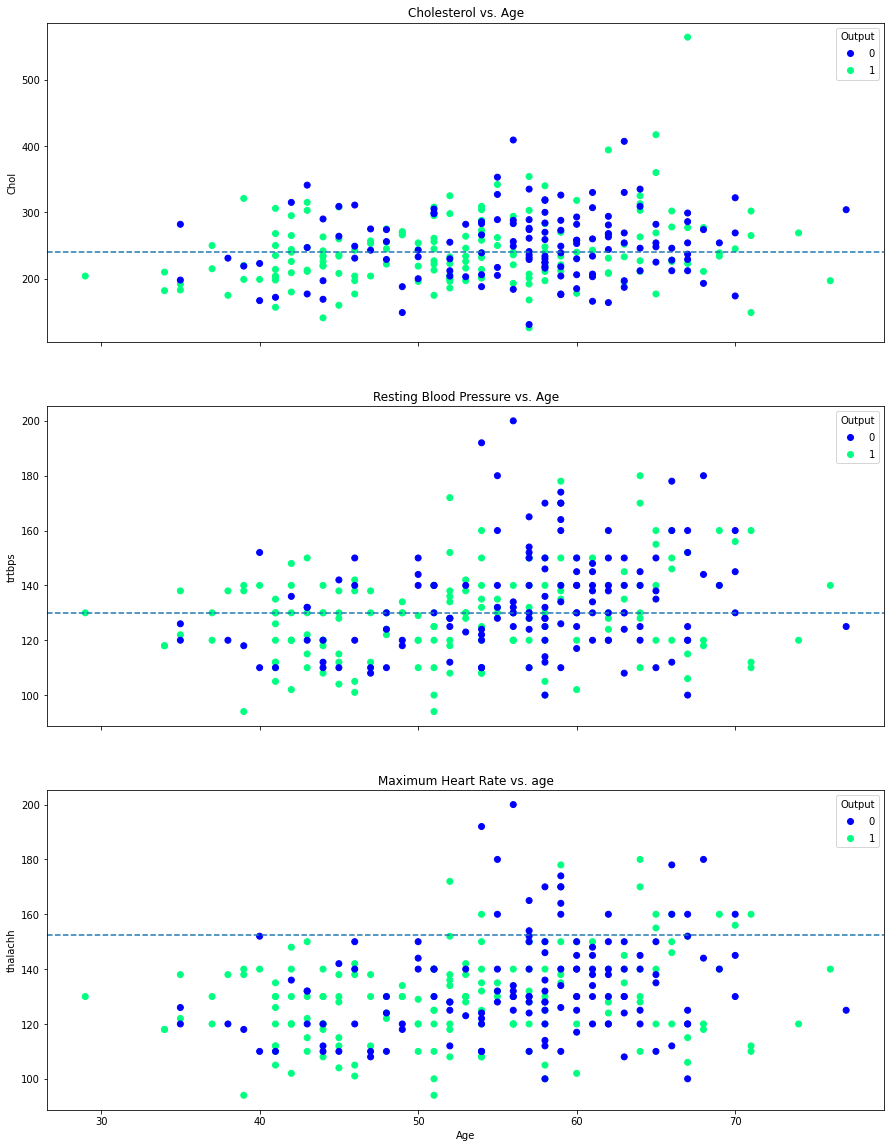

In [40]:
fig, (ax0, ax1, ax2) =plt.subplots(figsize=(15, 20), nrows=3, ncols=1, sharex=True)
scatter = ax0.scatter(x=df['age'], y=df['chol'], c=df['output'], cmap="winter")
ax0.set(title="Cholesterol vs. Age", ylabel="Chol")
ax0.legend(*scatter.legend_elements(), title="Output")
ax0.axhline(df['chol'].median(), linestyle='--')
scatter = ax1.scatter(x=df['age'], y=df['trtbps'], c=df['output'],  cmap="winter")
ax1.set(title="Resting Blood Pressure vs. Age", ylabel="trtbps")
ax1.legend(*scatter.legend_elements(), title="Output")
ax1.axhline(df['trtbps'].median(), linestyle='--')
scatter = ax2.scatter(x=df['age'], y=df['trtbps'], c=df['output'],  cmap="winter")
ax2.set(title="Maximum Heart Rate vs. age", xlabel="Age", ylabel="thalachh")
ax2.legend(*scatter.legend_elements(), title="Output")
ax2.axhline(df['thalachh'].median(), linestyle='--');

### Feature selection

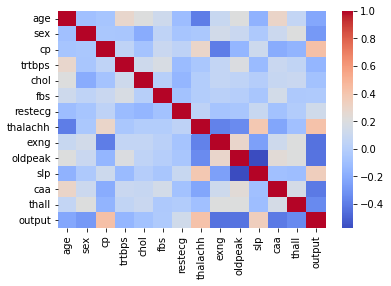

In [41]:
plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [42]:
y = df['output']
X = df.iloc[:, df.columns != 'output']
select = SelectKBest(score_func=f_regression, k=5)
z = select.fit_transform(X, y) 
kBest = pd.DataFrame( 
  {
      'features' : X.columns,
      'coefficient' : select.scores_
  }
  ).round(decimals=2).sort_values('coefficient', ascending=False)
kBest

,features,coefficient
8,exng,70.26
2,cp,68.86
9,oldpeak,67.72
7,thalachh,64.24
11,caa,60.26
10,slp,40.25
12,thall,40.03
1,sex,26.24
0,age,15.47
3,trtbps,6.56


**Model - Logistic Regression**

In [43]:
X = df.iloc[:, df.columns != 'output']
y = df['output'];

In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [45]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: output, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [48]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 85.89%
The accuracy for the test set is 83.61%


In [49]:
coeff_df = pd.DataFrame(model.coef_.T,X.columns,columns=['Coeff'])

coeff_df

,Coeff
age,0.006957
sex,-0.796828
cp,0.676700
trtbps,-0.453631
chol,-0.201540
fbs,0.163625
restecg,0.270774
thalachh,0.519172
exng,-0.492636
oldpeak,-0.510654


Logistic Regression Conclusion: Based on the trained coefficents, we have some idea of which factors are the most important in our model. As we saw above, the age distibution between men and women was similar and also men and women had an increased chance of heart attacks at almost the same age, we were not suprised that the model did not consider the age as a huge factor. However, in our logistic regression model, sex was a huge factor. It might be a biased feature because male patients are twice the size of female patients in our dataset. Other factors that also have significant influence, include cp - chest pain, trtbps - resting blood pressure, thalachh - maximum heart rate achieved, exng - exercise induced angina, oldpeak, slp, caa - number of major blood vessels, and thall - thal rate. The rest of the feautures had less influence in our logistic regression model.

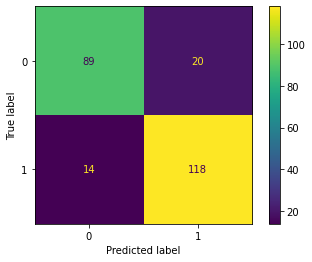

In [50]:
y_pred = model.predict(X_train_scaled)
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Improving accuracy using other models**

In [51]:
from sklearn import svm
C = [1, 5, 10, 100]
degree = [1, 2, 3]
kernel = ["linear", "poly", "rbf"]
decision_function_shape = ["ovo", "ovr"]
highest_SVM_accuracy = 0
for c in C:  # iterates over c
    for dg in degree:  # iterates over degree
        for knl in kernel:  # iterates kernel
            for shape in decision_function_shape:  # iterates over decision_function_shape
                # Create an SVM classifier that will test all combinations of c, degree, kernel, and decision_function_shape.
                clf = svm.SVC(C=c, degree=dg, kernel=knl, decision_function_shape=shape)
                # Fit SVM to the training data
                clf.fit(X_train_scaled, y_train)
                acc = clf.score(X_test_scaled, y_test)
                if acc > highest_SVM_accuracy:
                    highest_SVM_accuracy = acc
                    print("c:",c,"dg:",dg,"knl:",knl,"shape:",shape,"accuracy:",acc)

c: 1 dg: 1 knl: linear shape: ovo accuracy: 0.819672131147541
c: 1 dg: 1 knl: poly shape: ovo accuracy: 0.8524590163934426
c: 1 dg: 1 knl: rbf shape: ovo accuracy: 0.8688524590163934


Using a few predefined parameters, we developed various SVM models in the previous node to increase accuracy.

In [52]:
svc = svm.SVC(C=1, degree=1, kernel='rbf', decision_function_shape='ovo')
                   
svc.fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.8688524590163934

In [53]:
y_hat = svc.predict(X_test_scaled)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



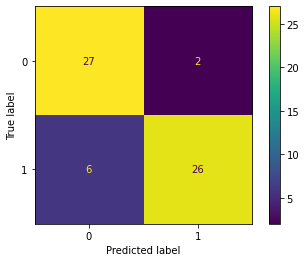

In [54]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The best parameters yielded an accuracy of 0.86. Even though the SVM model's accuracy is slightly higher than the accuracy achieved by the logistic regression model, the recall and precision values for the presence and absence of heart atack are 0.81 and 0.81 respectively. We will then create more models in order to achieve better results.

**Naive Bayes**

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb.score(X_test_scaled, y_test)

0.8852459016393442

In [56]:
y_hat = gnb.predict(X_test_scaled)                 
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



Using the Naive Bayes machine learning model, we improved recall and precision. The recall and precision values improved to 0.84 in the presence and absence of heart disease. Furthermore, the accuracy is slightly higher than that of the other two models.
After a quick research, we discovered that ensemble models such as Random Forest typically outperform classification problems similar to our project.

**Random Forest**

In [57]:
maxAcc = 0
for n in range(10, 100, 1):
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train_scaled, y_train)
    acc = clf.score(X_test_scaled, y_test)
    if acc > maxAcc:
        maxAcc = acc
        print(" n:", n, " accuracy:", acc)

 n: 10  accuracy: 0.8032786885245902
 n: 11  accuracy: 0.819672131147541
 n: 12  accuracy: 0.8360655737704918
 n: 14  accuracy: 0.8524590163934426
 n: 15  accuracy: 0.8688524590163934
 n: 19  accuracy: 0.8852459016393442
 n: 28  accuracy: 0.9016393442622951


In [58]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(X_train_scaled, y_train)
y_hat = clf.predict(X_test_scaled)                 
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



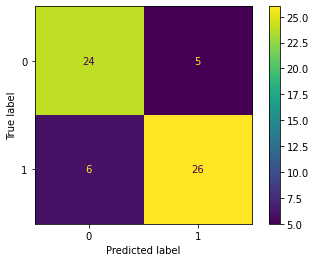

In [59]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The Random Forest ensemble model produced the best accuracy, recall, and precision measurements, as expected.